In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
sys.path.insert(0, '..')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from Xana import Xana
# from Xana.XpcsAna import CorrFunc as G2
# import pickle
from glob import glob
# import seaborn as sns
# import pandas as pd
# import h5py as h5
# import lmfit
import re
from lmfit.models import LinearModel
from pathlib import Path
#plt.style.use('../nbstyle.mplstyle')

In [3]:
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
anadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed'

# Analysis database

In [4]:
datafolder = 'ferritin_conc120_gly_50_2'
datasetnumber = 3

In [5]:
ana_db_files = glob(f'{anadir}/results/{datafolder}_{datasetnumber:04d}/p*/analysis_database.pkl')
ana_db_files

['/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc120_gly_50_2_0003/p341286/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc120_gly_50_2_0003/p341253/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc120_gly_50_2_0003/p341287/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc120_gly_50_2_0003/p341297/analysis_database.pkl']

In [6]:
d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', 
            setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl')
maskfile = d.setup.maskfile
d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', 
            setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl',
            maskfile=maskfile)

for i, f in enumerate(ana_db_files):
    if i == 0:
        d.load_db(f)
    else:
        d.append_db(f)

Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Try loading database:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc120_gly_50_2_0003/p341286/analysis_database.pkl
Successfully loaded database


In [7]:
def get_scan_number(s):
    s = str(s)
    s = re.search('(?<=scan)\d{4}', s)
    if s is not None:
        return int(s.group(0))
    else:
        return -1
    
def get_rep(x, reps_per_spot=1):
    scan = get_scan_number(x)
    rep = scan % reps_per_spot
    if rep == 0:
        rep = 4
    return rep

In [8]:
d.db['rep'] = d.db['master'].apply(lambda x: get_rep(x, reps_per_spot=4))
d.db['scannumber'] = d.db['datdir'].apply(lambda x: get_scan_number(str(x)))

In [9]:
rep = 1
ind_xpcs = d.db[(d.db['analysis'] == 'xpcs')
                & (d.db['rep'] == rep)].index.values
print(f"number of xpcs analysis: {len(ind_xpcs)}")
d.db.loc[ind_xpcs]

number of xpcs analysis: 90


use sample analysis                        mod         savname  \
1    True            xpcs 2023-07-04 23:02:29.994370  s0001_0001.pkl   
9    True            xpcs 2023-07-04 23:13:09.422285  s0005_0009.pkl   
17   True            xpcs 2023-07-04 23:23:48.946640  s0009_0017.pkl   
25   True            xpcs 2023-07-04 23:34:29.709568  s0013_0025.pkl   
33   True            xpcs 2023-07-04 23:45:09.356740  s0017_0033.pkl   
..    ...    ...      ...                        ...             ...   
685  True            xpcs 2023-07-05 04:10:42.762758  s0253_0145.pkl   
693  True            xpcs 2023-07-05 04:21:16.802296  s0257_0153.pkl   
701  True            xpcs 2023-07-05 04:31:50.792412  s0261_0161.pkl   
709  True            xpcs 2023-07-05 04:42:26.079648  s0265_0169.pkl   
717  True            xpcs 2023-07-05 04:53:02.781573  s0269_0177.pkl   

                                               savfile  \
1    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
9    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
17   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
25   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
33   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
..                                                 ...   
685  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
693  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
701  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
709  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   
717  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...   

                                             setupfile comment  series  \
1    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...             1.0   
9    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...             5.0   
17   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...             9.0   
25   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...            13.0   
33   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...            17.0   
..                                                 ...     ...     ...   
685  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...           253.0   
693  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...           257.0   
701  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...           261.0   
709  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...           265.0   
717  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...           269.0   

     t_exposure  t_readout  nframes  \
1        0.0004   0.000003   4990.0   
9        0.0004   0.000003   4990.0   
17       0.0004   0.000003   4990.0   
25       0.0004   0.000003   4990.0   
33       0.0004   0.000003   4990.0   
..          ...        ...      ...   
685      0.0004   0.000003   4990.0   
693      0.0004   0.000003   4990.0   
701      0.0004   0.000003   4990.0   
709      0.0004   0.000003   4990.0   
717      0.0004   0.000003   4990.0   

                                                master  first    last  \
1    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
9    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
17   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
25   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
33   /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
..                                                 ...    ...     ...   
685  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
693  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
701  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
709  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   
717  /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...   10.0  4999.0   

                                                datdir  rep  scannumber  
1    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...    1           1  
9    /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...    1  

# Load TTCs

In [31]:
def var(ttc):
        """Calculate the variance of the two-time correlation function.
        Args: ttc tto-time correlation function (2d array)
        To normalize:
            chi4 = vartrc(ttc)
            chi4 /= np.average(ttc)**2
        """
        n, tmp = np.shape(ttc)
        ttc_var = []
        
        for m in range(1, n-1):
            ttc_var.append(np.var(np.diag(ttc, m)))
#         chi4 = ttc_var / np.average(ttc)**2

        return ttc_var

def var_norm(ttc):
        """Calculate the variance of the two-time correlation function.
        Args: ttc tto-time correlation function (2d array)
        To normalize:
            chi4 = vartrc(ttc)
            chi4 /= np.average(ttc)**2
        """
        n, tmp = np.shape(ttc)
        ttc_var = []
        
        for i in range(1, n-1):
            ttc_var.append(np.var(np.diag(ttc, i)))
        chi4 = ttc_var / np.average(np.diag(ttc, k=0))**2

        return chi4

In [11]:
ind_xpcs

array([  1,   9,  17,  25,  33,  41,  49,  57,  65,  73,  81,  89,  97,
       105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201,
       209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305,
       313, 321, 329, 337, 345, 353, 365, 373, 381, 389, 397, 405, 413,
       421, 429, 437, 445, 453, 461, 469, 477, 485, 493, 501, 509, 517,
       525, 533, 541, 549, 557, 565, 573, 581, 589, 597, 605, 613, 621,
       629, 637, 645, 653, 661, 669, 677, 685, 693, 701, 709, 717])

In [33]:
%%timeit
chi4s = []

for ind in ind_xpcs[:10]:
    print(ind)
    chi4s.append(var(list(d.get_item(ind)['twotime_corf'].values())[2]))
print(chi4s)

1
9
17
25
33
41
49
57
65
73
[[63.22868, 62.17378, 60.50351, 41.229435, 55.17909, 56.679024, 45.781162, 68.97758, 68.74538, 57.16886, 38.39175, 61.962616, 62.78098, 68.47504, 51.40931, 49.65812, 57.867603, 32.851337, 73.43975, 47.43552, 55.65212, 59.99528, 50.102455, 41.27539, 56.354935, 36.2547, 40.650356, 55.144516, 43.25606, 52.052525, 43.027557, 32.140285, 44.155514, 50.75953, 53.617878, 51.659916, 46.520145, 40.30082, 50.718548, 42.53121, 56.07627, 68.0599, 59.273567, 52.17306, 56.061153, 41.87858, 50.946945, 52.56755, 58.789692, 65.014206, 32.71814, 39.60716, 46.14317, 68.753654, 38.936726, 42.603977, 55.136353, 65.81456, 49.698605, 28.069363, 84.75765, 56.79279, 62.15985, 45.183018, 39.9675, 29.376568, 33.0685, 43.059475, 53.761887, 67.79422, 46.97215, 46.02487, 48.436554, 76.45862, 37.069767, 62.459896, 69.23831, 54.54378, 68.861595, 57.46296, 31.512165, 66.23489, 48.049, 43.80053, 25.603941, 50.84262, 52.373634, 47.578472, 58.738064, 80.90841, 82.524254, 38.85533, 39.050716, 83

In [15]:
# %%timeit
chi4s2 = []

for ind in ind_xpcs[:5]:
    print(ind)
    chi4s2.append(var_norm(list(d.get_item(ind)['twotime_corf'].values())[2]))
print(chi4s2)


1
9
17
25
33
[array([91.00309, 89.48481, 87.08084, ...,  0.     ,  0.     ,  0.     ],
      dtype=float32), array([111.23964,  64.926  ,  94.3707 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32), array([153.5051 , 152.72581, 143.41737, ...,   0.     ,   0.     ,
         0.     ], dtype=float32), array([126.395035, 241.72516 , 222.36597 , ...,   0.      ,   0.      ,
         0.      ], dtype=float32), array([243.91975, 282.5198 , 234.32986, ...,   0.     ,   0.     ,
         0.     ], dtype=float32)]


In [16]:
chi4s2[0]

array([91.00309, 89.48481, 87.08084, ...,  0.     ,  0.     ,  0.     ],
      dtype=float32)

In [18]:
time = d.get_item(ind_xpcs[0])['twotime_xy'][1:-1]

In [55]:
chi4 = np.mean(chi4s[:10], axis=0)

(0.0, 200.0)

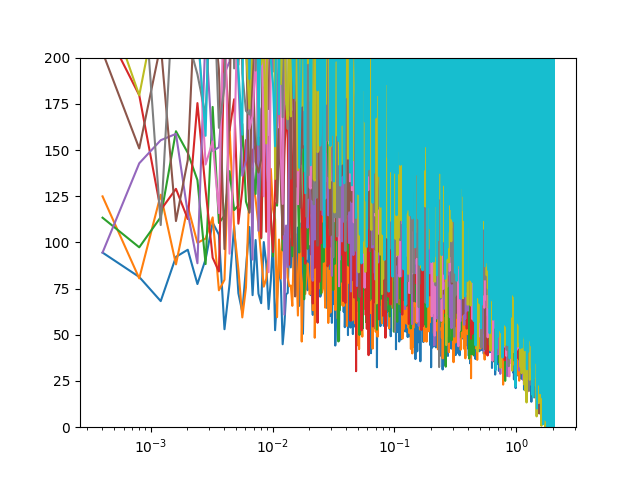

In [54]:
plt.figure()
for i in chi4s[:10]:
    plt.plot(time, i)
plt.xscale('log')
plt.ylim(0,200)
# plt.xlabel('$\tau$ (s)')
# plt.ylabel('$\Chi_4$')

NameError: name 'chi4s' is not defined

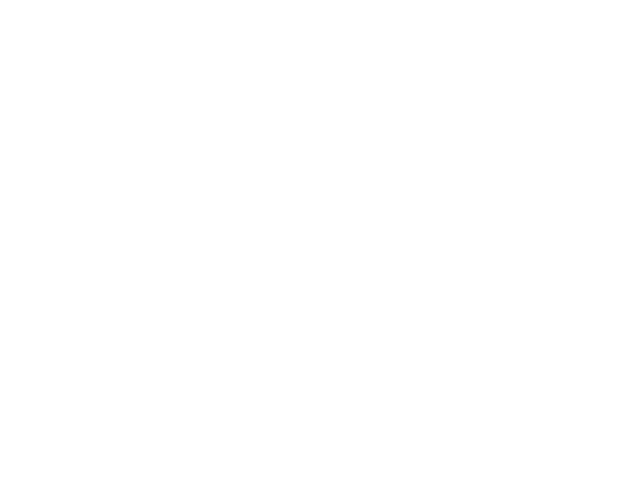

In [34]:
plt.figure()
plt.plot(time, np.mean(chi4s, axis=0))
# plt.plot(time, np.mean(chi4s[15:], axis=0))
plt.plot(time, np.mean(chi4s2, axis=0))
plt.xscale('log')
plt.ylim(0,200)
# plt.xlabel('$\tau$ (s)')
# plt.ylabel('$\Chi_4$')

In [22]:
ttcs = list(d.get_item(ind_xpcs[0])['twotime_corf'].values())

In [23]:
np.shape(ttcs)

(10, 4990, 4990)

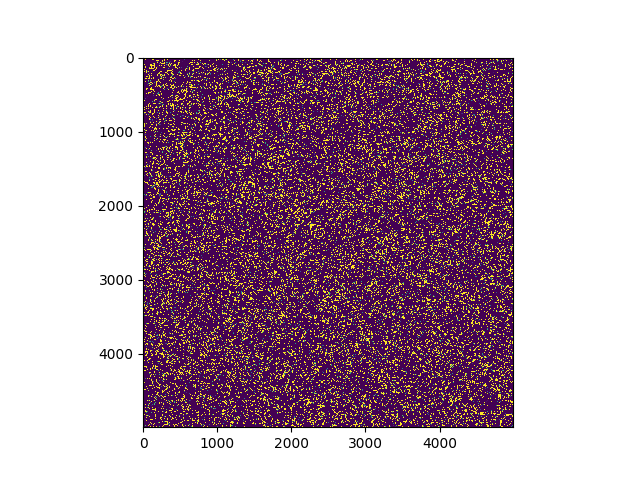

In [24]:
plt.figure()
plt.imshow(ttcs[2], vmin=1, vmax=1.1)

In [27]:
np.average(np.diag(ttcs[2], k=0))

0.83354485

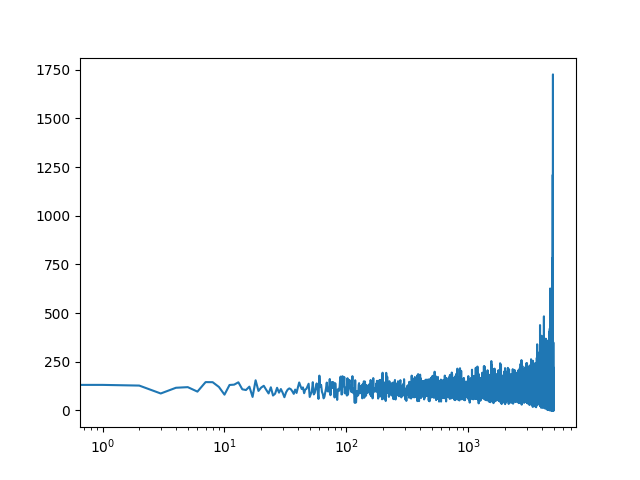

In [28]:
chi4 = vartrc(ttcs[2])

plt.figure()
plt.plot(chi4)
plt.xscale('log')


In [ ]:
f['/xpcs/g2s/delay'] = delay
f['/xpcs/g2s/q'] = qv
f['/xpcs/ttcs/q'] = qv[twotime_par]
f['/xpcs/ttcs/times'] = ttc_times
f['/xpcs/ttcs/twotime_par'] = twotime_par
f['/xpcs/scans'] = xpcs_scans
f['/saxs/q'] = qI
f['/saxs/scans'] = saxs_scans

good_indices = []
print("Number of repetitions: ", args.repsperspot, '\n')

print("Writing xpcs data")

for j,rep in enumerate(reps):
    # temporarily here, in the rep loop it will be overwritten
    ind_xpcs = xana.db[(xana.db['analysis'] == 'xpcs') & (xana.db['rep'] == rep)].index.values

    print("\trepetition: ", rep, '\t number of spots: ', len(ind_xpcs))
    ttcs_qs = np.empty(shape=(len(ind_xpcs), nttc, ntimes, ntimes))
    g2s_qs = np.empty(shape=(len(ind_xpcs), nq, ndelay))

    baseline = np.empty(shape=len(ind_xpcs)) # test

    for i,ind in tqdm(enumerate(ind_xpcs), total=len(ind_xpcs)):
        ttcs_qs[i] = np.stack(list(xana.get_item(ind)['twotime_corf'].values()), axis=0) # (nspots, nqs, t1, t2)
        g2s_qs[i] = xana.get_item(ind)['corf'][1:,1:].T # (nspots, nqs, delays)
        baseline[i] = np.average(ttcs_qs[i][1][:300,-300:]) # test

# Functions

In [41]:
def vartrc(ttc):
        """Calculate the variance of the two-time correlation function.
        Args: ttc tto-time correlation function (2d array)
        To normalize:
            chi4 = vartrc(ttc)
            chi4 /= np.average(ttc)**2
        """
        n, tmp = np.shape(ttc)
        ttc_var = []
        
        for i in range(1, n-1):
            ttc_var.append(np.var(np.diag(ttc, i)))
#         chi4 = ttc_var / np.average(ttc)**2

        return ttc_var